# <font color='blue'>Week 5 - Machine Learning Intro</font>

### <font color='red'> Used: Python and its libraries; NumPy and Pandas library. Jupyter Notebook. </font>

**Selected a dataset of your choice from the seaborn library **
* Perform an exploratory (visualisations) analysis similar to Module 5.0-SM
* Apply a classification algorithm and then evaluate the classification model as it is done in Module 5.1-SM

In [79]:
import pandas 
import numpy 
import seaborn
import matplotlib.pyplot as matPlotLibPyPlot
%matplotlib inline
seaborn.set(style="white")

# reference: github
#
https://github.com/mwaskom/seaborn-data/blob/master/exercise.csv 
# 
https://github.com/mwaskom/seaborn-data
# 
http://seaborn.pydata.org/

**Names of the dataset are shown in the following**

In [80]:
seaborn.get_dataset_names() #available databse names as per py lib, github


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

# Using 'titanic' as a dataset:

In [81]:
df = seaborn.load_dataset('titanic')
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
36,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True
684,0,2,male,60.0,1,1,39.0000,S,Second,man,True,NaN,Southampton,no,False
317,0,2,male,54.0,0,0,14.0000,S,Second,man,True,NaN,Southampton,no,True
647,1,1,male,56.0,0,0,35.5000,C,First,man,True,A,Cherbourg,yes,True
723,0,2,male,50.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [84]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
528,0,3,male,39.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
723,0,2,male,50.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
709,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False


In [85]:
df.keys()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [86]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
# this is not zero its 'o' # the summary for non numerical columns

df.describe(include=['O'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [88]:
df.describe(include='all') # the summary for all num cols

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df.notna().head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


In [90]:
df.notnull().head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


In [91]:
df['age'].head(5) #df.age

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [92]:
# all who's age ''missing'' NaN

df[df.age.isna()].head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [93]:
# all who's age NaN

df[df.age.isnull()].head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [95]:
#import our csv manually titanic

In [96]:
df1 = pandas.read_csv('titanic.csv')
df1.sample(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
502,0,3,female,NaN,0,0,7.6292,Q,Third,woman,False,NaN,Queenstown,no,True
300,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
724,1,1,male,27.0,1,0,53.1000,S,First,man,True,E,Southampton,yes,False


In [97]:
df1[df1.age.isna()].head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


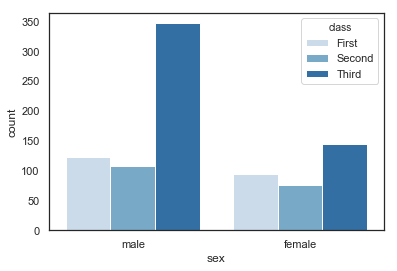

In [98]:
seaborn.countplot(x='sex',data=df, hue='class', palette="Blues")

## LINE CHART 

[7, 40, 101, 554, 775]         [-213, 260, -119, 774, 555]


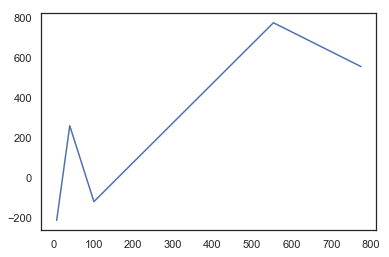

In [99]:
import matplotlib.pyplot as matPlotLibPyPlot

x1 = [7, 40, 101, 554, 775]
y1 = [i+220 if i%2==0 else i-220 for i in x1]
print(x1,"       ", y1)
matPlotLibPyPlot.plot(x1,y1)
matPlotLibPyPlot.show()

## BoxPlot

[1, 2, 3]
[array([-0.20421271, -1.27808308,  0.32226196, -0.30283345,  0.60348121,
       -1.39697219, -0.35829641]), array([ 1.00874622, -1.31044496, -3.83080487, -0.86940474,  2.08108382,
        1.28204429,  0.08000553]), array([ 2.07328743,  5.50001636,  3.19736403,  1.64331598,  0.44584857,
       -1.37302689,  0.86855866])]


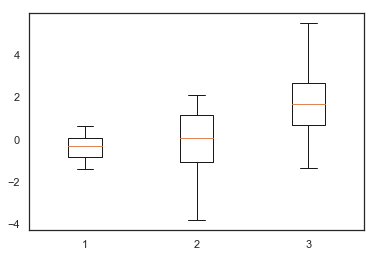

In [101]:
import numpy
import matplotlib.pyplot as matPlotLibPyPlot

a1=range(1,4)
print(list(a1))

#Generate 3 normal distributions with standard deviation 1,2 and 3
data01 = [numpy.random.normal(0,i,7) for i in a1 ]
print(data01)

matPlotLibPyPlot.boxplot(data01, vert=True)
matPlotLibPyPlot.show()

## Histogram

[-0.88857139 -0.76886411 -0.07368606 -1.02562432 -0.03458641  0.11506299
  1.12165641 -0.08548337 -0.78288885 -0.38519893 -0.42676491  1.86640079
 -0.77337441 -1.48015896 -1.64990323 -0.55851004 -1.64079919  0.64481825
  0.83257221  1.39906205]


NameError: name 'matplotlibpyplot' is not defined

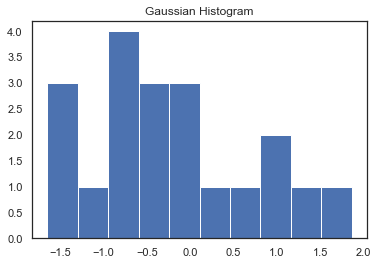

In [102]:
from numpy.random import normal
import matplotlib.pyplot as matPlotLibPyPlot

gaussian_numb = normal(size=20)
print(gaussian_numb)

histo1=matPlotLibPyPlot.hist(x=gaussian_numb)
#histo1

matPlotLibPyPlot.title("Gaussian Histogram")
matplotlibpyplot.xlabel("Value")
matPlotLibPyPlot.ylabel("Freq")
matplotlibpyplot.show()

## Pie Chart

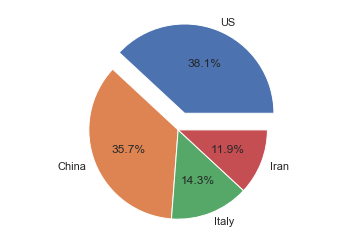

In [103]:
import matplotlib.pyplot as matPlotLibPyPlot

labels = 'US', 'China', 'Italy', 'Iran'
values = [80, 75, 30, 25]
explode = (0.2, 0, 0, 0) #move slihlu like pizza slice

x3, fig1 = matPlotLibPyPlot.subplots()
fig1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%' )
fig1.axis('equal')
matPlotLibPyPlot.show()

## Barplot

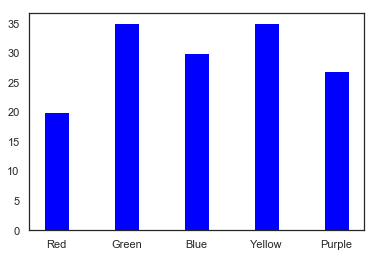

In [104]:
import matplotlib.pyplot as matPlotLibPyPlot

baskets = [20, 35, 30, 35, 27]
n=5

# np.arange(N) genrates the x locations array([0, 1, 2, 3, 4])
ind = numpy.arange(n) # the x locations for the groups

width = 0.35 # the width of the bars

x2, fig2 = matPlotLibPyPlot.subplots()
fig2.bar( ind, baskets, width, color='blue')
fig2.set_xticks(ind)
fig2.set_xticklabels(('Red', 'Green', 'Blue', 'Yellow', 'Purple'))

matPlotLibPyPlot.show()

# <font color='blue'>---------- Completed Module 5.0 SM -----------</font>


# <font color='blue'>------------- Starting Module 5.1 SM ------------</font>


Classification accuracy
Pima Indian Diabetes dataset (https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) from the UCI Machine Learning
Repository

In [105]:
import pandas

In [106]:
pima = pandas.read_csv("pima-indians-diabetes.csv", index_col=0)

In [107]:
pima.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1


In [108]:
pima.keys()

Index(['pregnant ', 'glucose', 'bp', 'skin', 'insulin ', 'bmi', 'pedigree ',
       'age ', 'label'],
      dtype='object')

In [109]:
pima.columns

Index(['pregnant ', 'glucose', 'bp', 'skin', 'insulin ', 'bmi', 'pedigree ',
       'age ', 'label'],
      dtype='object')

**Question: Can we predict the diabetes status of a patient given their health measurements?**

In [110]:
#define x y variables: x =independent variable, y =dependent
x= pima.iloc[:,:8]   # x = independent var
x.head(5)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
1,6,148,72,35,0,33.6,0.627,50
2,1,85,66,29,0,26.6,0.351,31
3,8,183,64,0,0,23.3,0.672,32
4,1,89,66,23,94,28.1,0.167,21
5,0,137,40,35,168,43.1,2.288,33


In [111]:
y= pima['label'] # or 
#y = pima.iloc[:,8:9]

y.head(5)



1    1
2    0
3    1
4    0
5    1
Name: label, dtype: int64

**split x, y into training and testing sets**

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=1029)

**train a Logistic regression model**

In [113]:
from sklearn.linear_model import LogisticRegression
my_logi_regr= LogisticRegression()
my_logi_regr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

***make class prediction .predit() for testing model***

In [114]:
predict_y_astest = my_logi_regr.predict(x_test)

In [115]:
predict_y_astest[0:25]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0], dtype=int64)

In [116]:
y_test[0:25]
y_test.values[0:25]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

 find accuracy: of my model my_logi_regr using **metrics.accuracy_score()** function
 ### calculate accuracy

In [117]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, predict_y_astest))

0.765625


In [118]:
y_test.count()

192

In [119]:
y_test.shape

(192,)

In [120]:
predict_y_astest.shape

(192,)

In [121]:
#calculate percentage of ones

y_test.mean()

0.3385416666666667

In [122]:
#calculate % of 0s

1-y_test.mean()

0.6614583333333333

In [123]:
max(y_test.mean(), 1-y_test.mean())

0.6614583333333333

compare **ture_value(y_test)** vs **predicted_value(predict_y_astest)**

In [126]:
## you dont need, but to learn this print() is located here
from __future__ import print_function

print("True vales are as it is (y) : ", y_test.values[0:10] )

print("predicted value of y are: ", predict_y_astest[0:10])

True vales are as it is (y) :  [1 0 0 0 0 0 0 1 0 1]
predicted value of y are:  [0 0 0 0 1 0 0 0 0 1]


# describes the performance of a classification model

# Confusion matrix

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
print (metrics.confusion_matrix(y_test, predict_y_astest))

[[110  17]
 [ 28  37]]


compare **ture_value(y_test)** vs **predicted_value(predict_y_astest)**
1 more time...

In [129]:
from __future__ import print_function

print("True vales are as it is (y) : ", y_test[0:10])

print("predicted value of y are: ", predict_y_astest[0:10])

True vales are as it is (y) :  94     1
727    0
419    0
34     0
704    0
30     0
460    0
165    1
383    0
339    1
Name: label, dtype: int64
predicted value of y are:  [0 0 0 0 1 0 0 0 0 1]


In [134]:
# save confusion matrix and slice into four pieces
my_confusion_matrix = metrics.confusion_matrix(y_test, predict_y_astest)
print(my_confusion_matrix)

TN= my_confusion_matrix[0,0]
TP= my_confusion_matrix[1,1]

FN =my_confusion_matrix[1,0]
FP =my_confusion_matrix[0,1]

print("")

print("TN-",TN)
print("TP-",TP)
print("FN-",FN)
print("FP-",FP)

[[110  17]
 [ 28  37]]

TN- 110
TP- 37
FN- 28
FP- 17


***calculation parameters form confusion matrix***

In [141]:
#Classification's Accuracy:

print ((TP + TN) / (TN+TP+FN+FP))
print (metrics.accuracy_score(y_test, predict_y_astest))

0.765625
0.765625


In [142]:
#Classification's Error:

print((FN+FP) / (TN+TP+FN+FP))
print(1 - metrics.accuracy_score(y_test, predict_y_astest))

0.234375
0.234375


In [143]:
#Classification's Sensitivity OR recall ( TRUE POSITIVE RATE ):

print(TP / (TP+FN))
print(metrics.recall_score(y_test, predict_y_astest))

0.5692307692307692
0.5692307692307692


In [146]:
#Classification's speecificity:

print(TN / (TN+FP))

0.8661417322834646


In [147]:
#False Positive Rate:

print(FP / (TN+FP))

0.13385826771653545


In [149]:
print((((TN / (TN+FP)))  +   (FP / (TN+FP))))

1.0


In [151]:
#Precision: how PRECISE my model is:

print (TP / (TP + FP))
print(metrics.precision_score(y_test,predict_y_astest))

0.6851851851851852
0.6851851851851852


### Conclusion:
Confusion matrix gives you a more clear and complete picture of how classifier is wroking..

In [155]:
my_logi_regr.predict(x_test)[0:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [160]:
my_logi_regr.predict_proba(x_test)[0:10 , :]

array([[0.75481112, 0.24518888],
       [0.76175882, 0.23824118],
       [0.93452432, 0.06547568],
       [0.90848315, 0.09151685],
       [0.35181594, 0.64818406],
       [0.7195948 , 0.2804052 ],
       [0.55515752, 0.44484248],
       [0.75006948, 0.24993052],
       [0.76544745, 0.23455255],
       [0.21277673, 0.78722327]])

In [168]:
my_logi_regr.predict_proba(x_test)[0:10 , 1]

array([0.24518888, 0.23824118, 0.06547568, 0.09151685, 0.64818406,
       0.2804052 , 0.44484248, 0.24993052, 0.23455255, 0.78722327])

In [199]:
y_side_prob = my_logi_regr.predict_proba(x_test)[0: , 1]
y_side_prob

array([0.24518888, 0.23824118, 0.06547568, 0.09151685, 0.64818406,
       0.2804052 , 0.44484248, 0.24993052, 0.23455255, 0.78722327,
       0.10534217, 0.27098986, 0.23420685, 0.78334381, 0.13312249,
       0.30865803, 0.19317958, 0.33220273, 0.62289689, 0.36260877,
       0.50412667, 0.51145965, 0.24361594, 0.43919629, 0.18178447,
       0.2637711 , 0.18279133, 0.22304172, 0.23638341, 0.10113386,
       0.1893275 , 0.15057606, 0.24608828, 0.70052739, 0.12212981,
       0.09041722, 0.60241527, 0.12879201, 0.34044612, 0.24899806,
       0.37512883, 0.14833741, 0.35091564, 0.3605631 , 0.79158081,
       0.77540206, 0.96748137, 0.30071514, 0.81750761, 0.34848385,
       0.20790975, 0.43519099, 0.04770199, 0.17590764, 0.0966152 ,
       0.15723538, 0.42779156, 0.32546826, 0.2184069 , 0.7060182 ,
       0.38293565, 0.41457515, 0.60787837, 0.08202505, 0.46108438,
       0.11943301, 0.36638398, 0.56535389, 0.76727489, 0.2171846 ,
       0.09787813, 0.49302129, 0.19752709, 0.11779625, 0.72918

### adding histogram

Text(0,0.5,'Frequency')

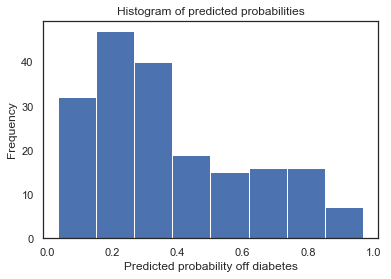

In [171]:
import matplotlib.pyplot as matPlotLibPyPlot

matPlotLibPyPlot.rcParams['font.size'] = 20

matPlotLibPyPlot.hist(y_side_prob, bins=8)
matPlotLibPyPlot.title('Histogram of predicted probabilities')
matPlotLibPyPlot.xlabel('Predicted probability off diabetes')
matPlotLibPyPlot.ylabel('Frequency')


In [180]:
from sklearn.preprocessing import binarize
y_side_prob_binarize = binarize([y_side_prob], 0.3) [0]

In [181]:
y_side_prob_binarize[0:10]

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])

In [182]:
y_side_prob[0:10]

array([0.24518888, 0.23824118, 0.06547568, 0.09151685, 0.64818406,
       0.2804052 , 0.44484248, 0.24993052, 0.23455255, 0.78722327])

In [189]:
# our original confusion matrix
# orignal = (threshould was=default = 0.5= no parameter was passed)
my_confusion_matrix

array([[110,  17],
       [ 28,  37]], dtype=int64)

In [191]:
# the new confusion matrix score has been improved as below 
# as a result of changing the threshold.

metrics.confusion_matrix(y_test, y_side_prob_binarize)

array([[78, 49],
       [10, 55]], dtype=int64)

In [192]:
# sesitivity incresed :
print( 55 / (55+10))

0.8461538461538461


In [193]:
# sesitivity was :
print( 28 / (28+37))

0.4307692307692308


In [194]:
## specificity decresed:
print(78 / (78+49))

0.6141732283464567


In [196]:
## specificity was:
print(110 / (110 +17))

0.8661417322834646


### Sensitivity and specificity had an inverse relationship

### ROC Curves and Area Under the Curve (AUC)

Text(0.5,1,'ROC curve for diabetes classifier')

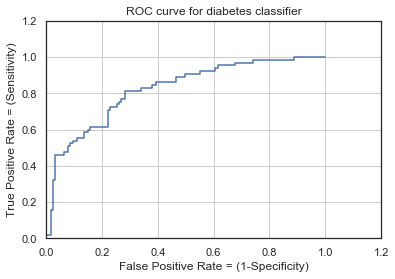

In [221]:
#adding plot
import matplotlib.pyplot as matPlotLibPyPlot

a, b, c_threshold = metrics.roc_curve(y_test, y_side_prob)
matPlotLibPyPlot.plot(a, b)
matPlotLibPyPlot.grid(True)
matPlotLibPyPlot.xlim([0.0,1.2])
matPlotLibPyPlot.ylim([0.0,1.2])
matPlotLibPyPlot.xlabel('False Positive Rate = (1-Specificity)')
matPlotLibPyPlot.ylabel('True Positive Rate = (Sensitivity)')
matPlotLibPyPlot.title('ROC curve for diabetes classifier')

In [246]:
def evaulate_threshold_functn(threshold_arg):
    print('Sensitivity' , b[c_threshold   > threshold_arg] )
    print('Specificity' , 1-b[c_threshold > threshold_arg] ) 
    print("--------")
    print('Sensitivity' , b[c_threshold   > threshold_arg] [-1] )
    print('Specificity' , 1-b[c_threshold > threshold_arg] [-1] ) 
    

In [247]:
evaulate_threshold_functn(0.5)

Sensitivity [0.01538462 0.01538462 0.15384615 0.15384615 0.32307692 0.32307692
 0.46153846 0.46153846 0.47692308 0.47692308 0.50769231 0.50769231
 0.52307692 0.52307692 0.53846154 0.53846154 0.55384615 0.55384615]
Specificity [0.98461538 0.98461538 0.84615385 0.84615385 0.67692308 0.67692308
 0.53846154 0.53846154 0.52307692 0.52307692 0.49230769 0.49230769
 0.47692308 0.47692308 0.46153846 0.46153846 0.44615385 0.44615385]
--------
Sensitivity 0.5538461538461539
Specificity 0.4461538461538461


In [248]:
evaulate_threshold_functn(0.3)

Sensitivity [0.01538462 0.01538462 0.15384615 0.15384615 0.32307692 0.32307692
 0.46153846 0.46153846 0.47692308 0.47692308 0.50769231 0.50769231
 0.52307692 0.52307692 0.53846154 0.53846154 0.55384615 0.55384615
 0.58461538 0.58461538 0.6        0.6        0.61538462 0.61538462
 0.70769231 0.70769231 0.72307692 0.72307692 0.73846154 0.73846154
 0.75384615 0.75384615 0.76923077 0.76923077 0.81538462 0.81538462
 0.83076923 0.83076923 0.84615385]
Specificity [0.98461538 0.98461538 0.84615385 0.84615385 0.67692308 0.67692308
 0.53846154 0.53846154 0.52307692 0.52307692 0.49230769 0.49230769
 0.47692308 0.47692308 0.46153846 0.46153846 0.44615385 0.44615385
 0.41538462 0.41538462 0.4        0.4        0.38461538 0.38461538
 0.29230769 0.29230769 0.27692308 0.27692308 0.26153846 0.26153846
 0.24615385 0.24615385 0.23076923 0.23076923 0.18461538 0.18461538
 0.16923077 0.16923077 0.15384615]
--------
Sensitivity 0.8461538461538461
Specificity 0.15384615384615385


In [249]:
print(metrics.roc_auc_score(y_test, y_side_prob))

0.8220472440944881


--------------------XX------------XX-------------XX---------------------

# EXTRA WORK:

In [131]:
df1.sample(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
425,0,3,male,NaN,0,0,7.250,S,Third,man,True,NaN,Southampton,no,True
548,0,3,male,33.0,1,1,20.525,S,Third,man,True,NaN,Southampton,no,False
324,0,3,male,NaN,8,2,69.550,S,Third,man,True,NaN,Southampton,no,False
562,0,2,male,28.0,0,0,13.500,S,Second,man,True,NaN,Southampton,no,True


In [51]:
df.sample(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
609,1,1,female,40.0,0,0,153.4625,S,First,woman,False,C,Southampton,yes,True
760,0,3,male,NaN,0,0,14.5000,S,Third,man,True,NaN,Southampton,no,True
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False
367,1,3,female,NaN,0,0,7.2292,C,Third,woman,False,NaN,Cherbourg,yes,True


In [281]:
df2 = df1.dropna()  # it drop all nulls from all columns.
df2.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
698,0,1,male,49.0,1,1,110.8833,C,First,man,True,C,Cherbourg,no,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
429,1,3,male,32.0,0,0,8.0500,S,Third,man,True,E,Southampton,yes,True
487,0,1,male,58.0,0,0,29.7000,C,First,man,True,B,Cherbourg,no,True
390,1,1,male,36.0,1,2,120.0000,S,First,man,True,B,Southampton,yes,False


# Using 'exercise' as a dataset:

In [96]:
df_exercise = seaborn.load_dataset('exercise')
df_exercise # it has 0-->89 =90 exercise in total

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [47]:
df_exercise = pandas.read_csv("exercise.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 49, saw 2


In [97]:
df_exercise.keys()

Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

In [98]:
df_exercise.head(0)

,Unnamed: 0,id,diet,pulse,time,kind


In [99]:
df_exercise.sample(3)

,Unnamed: 0,id,diet,pulse,time,kind
54,54,19,no fat,97,1 min,walking
47,47,16,no fat,89,30 min,walking
45,45,16,no fat,84,1 min,walking


In [101]:
df_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
Unnamed: 0    90 non-null int64
id            90 non-null int64
diet          90 non-null category
pulse         90 non-null int64
time          90 non-null category
kind          90 non-null category
dtypes: category(3), int64(3)
memory usage: 2.8 KB


In [102]:
df_exercise.describe()

,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


In [103]:
df_exercise.describe(exclude=['O'])

,Unnamed: 0,id,diet,pulse,time,kind
count,90.000000,90.000000,90,90.000000,90,90
unique,NaN,NaN,2,NaN,3,3
top,NaN,NaN,low fat,NaN,30 min,running
freq,NaN,NaN,45,NaN,30,30
mean,44.500000,15.500000,NaN,99.700000,NaN,NaN
std,26.124701,8.703932,NaN,14.858471,NaN,NaN
min,0.000000,1.000000,NaN,80.000000,NaN,NaN
25%,22.250000,8.000000,NaN,90.250000,NaN,NaN
50%,44.500000,15.500000,NaN,96.000000,NaN,NaN
75%,66.750000,23.000000,NaN,103.000000,NaN,NaN


In [104]:
# the summary for objects columns
# first go to df_exercise.describe(), it will show you schema and see object float etc...there 'O'=Object
df_exercise.describe(include=['O'])

ValueError: No objects to concatenate

In [105]:
# the summary for objects columns
# first go to df_exercise.describe(), it will show you schema and see object float etc...there 'O'=Object
df_exercise.describe(include=['S'])

TypeError: string dtypes are not allowed, use 'object' instead

In [198]:
df_exercise.describe(include='all')

,Unnamed: 0,id,diet,pulse,time,kind
count,90.000000,90.000000,90,90.000000,90,90
unique,NaN,NaN,2,NaN,3,3
top,NaN,NaN,low fat,NaN,1 min,running
freq,NaN,NaN,45,NaN,30,30
mean,44.500000,15.500000,NaN,99.700000,NaN,NaN
std,26.124701,8.703932,NaN,14.858471,NaN,NaN
min,0.000000,1.000000,NaN,80.000000,NaN,NaN
25%,22.250000,8.000000,NaN,90.250000,NaN,NaN
50%,44.500000,15.500000,NaN,96.000000,NaN,NaN
75%,66.750000,23.000000,NaN,103.000000,NaN,NaN


# Bar charts

In [74]:
palette_dictionary = dict(running="#0EA353", walking="#800000" ,rest="#EDDFF7")

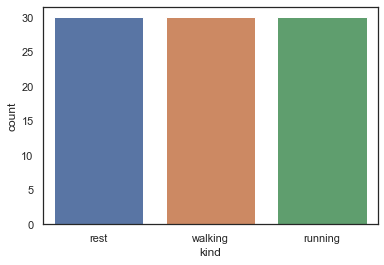

In [141]:
df_exercise = seaborn.load_dataset('exercise')
seaborn.countplot(x='kind',data=df_exercise)

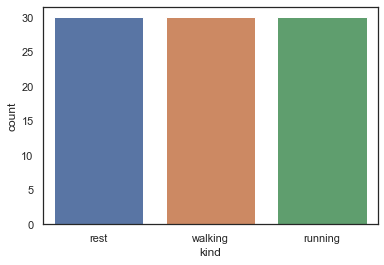

In [142]:
df_exercise = pandas.read_csv('exercise.csv')
df_exercise.sample(3)
seaborn.countplot(x='kind',data=df_exercise)
# I have modified numbers of seating and running peple

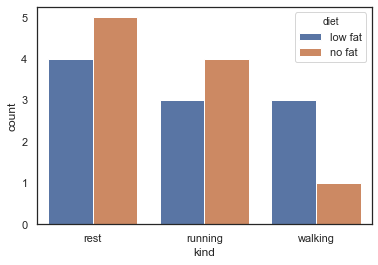

In [146]:
seaborn.countplot("kind", data=df_exercise.sample(20), hue="diet")
# I had to limit data as the data is distributed equally in dataset, so count fucntion doesnt work.

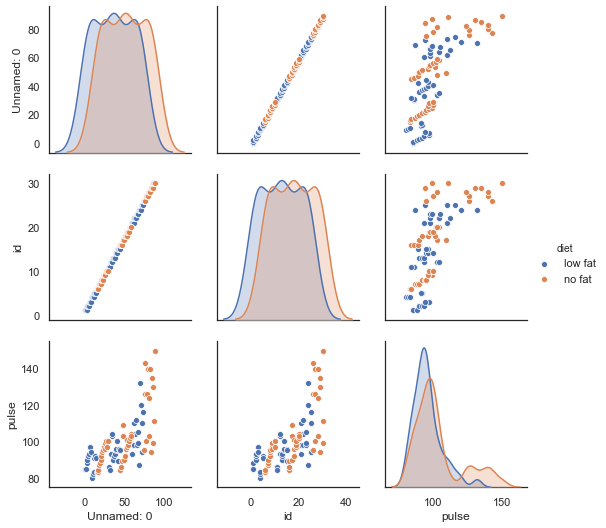

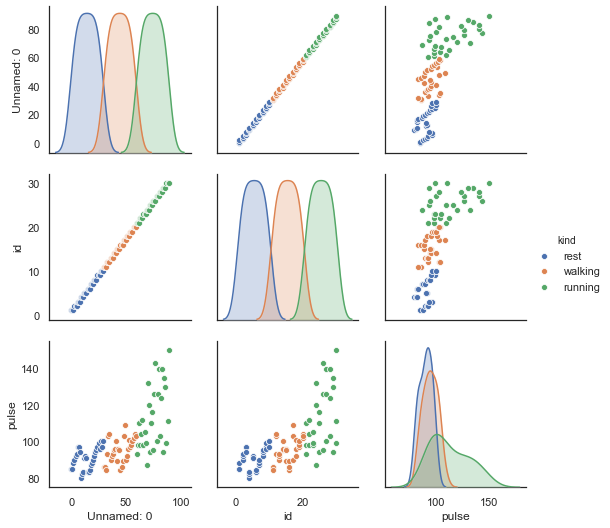

In [152]:
seaborn.pairplot(data=df_exercise,hue='diet')
seaborn.pairplot(data=df_exercise,hue='kind')

In [154]:
%autosave 20

Autosaving every 20 seconds


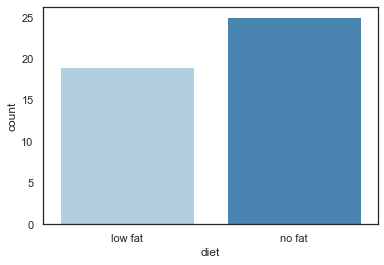

In [193]:
seaborn.countplot("diet", data=df_exercise.sample(44), palette="Blues");


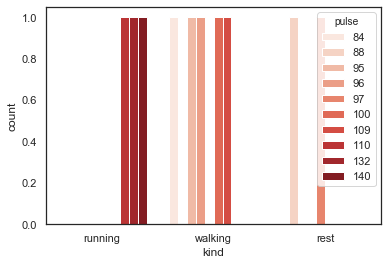

In [194]:
seaborn.countplot("kind", data=df_exercise.sample(10), hue="pulse", palette="Reds");

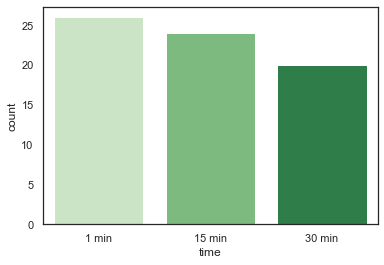

In [195]:
seaborn.countplot("time", data=df_exercise.sample(70), palette="Greens");

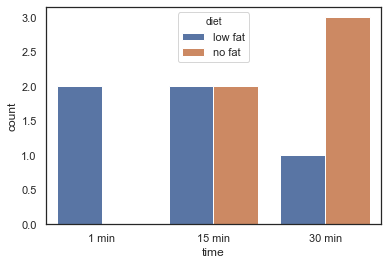

In [196]:
seaborn.countplot("time", hue="diet", data=df_exercise.sample(10))

# Line chart
using
# MatplotLib.pyplot

In [199]:
import matplotlib.pyplot as matPlotLibPyPlot

In [207]:
x1 = df_exercise.kind

In [216]:
y1 = df_exercise.id

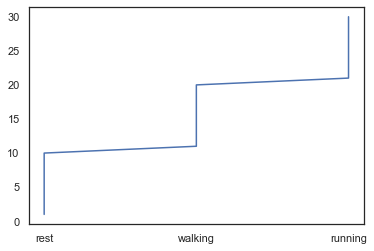

In [217]:
sample_matplot = matPlotLibPyLib.plot(x1,y1)
sample_matplot
matPlotLibPyPlot.show()

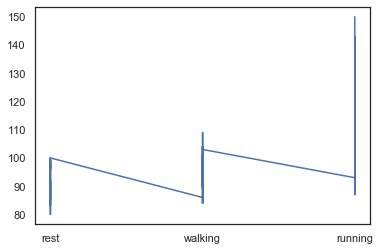

In [221]:
x1 = df_exercise.kind
y1 = df_exercise.pulse
sample_matplot = matPlotLibPyLib.plot(x1,y1)
sample_matplot
matPlotLibPyPlot.show()

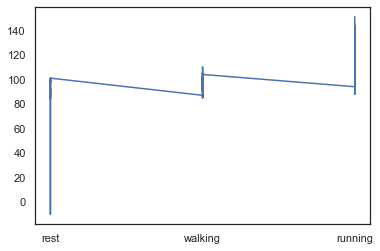

In [235]:
x1 = df_exercise.kind
y1 = df_exercise.pulse
y2 = [i+1 if i>80 else i-90 for i in y1] # killing the person with <80 heartrate here!
sample_matplot = matPlotLibPyLib.plot(x1,y2)
sample_matplot

# Boxplot (Quantitative - Numeric Data)

In [242]:
sample1 = list(range(40))
print(sample1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [249]:
# Generate 3 normal distributions with standard deviation 1,2 and 3 -->39

In [250]:
import numpy

In [262]:
data_sample = [numpy.random.random_sample(100) ] 
data_sample

[array([0.73544124, 0.79074088, 0.06312837, 0.29666061, 0.56928405,
        0.30530998, 0.61209334, 0.73294966, 0.37036366, 0.88081939,
        0.82067564, 0.02130509, 0.60164731, 0.31242628, 0.93562567,
        0.58269112, 0.91905502, 0.41356845, 0.38245154, 0.22662246,
        0.15120764, 0.27305393, 0.77820282, 0.25928453, 0.94313644,
        0.06138079, 0.70346377, 0.87048854, 0.00504115, 0.23800505,
        0.01706366, 0.77179849, 0.50284586, 0.67267888, 0.75809567,
        0.64885616, 0.69471727, 0.24414489, 0.23886431, 0.87362204,
        0.04364364, 0.34209969, 0.252976  , 0.08691659, 0.82380593,
        0.84657445, 0.57770061, 0.25785355, 0.01620075, 0.6392258 ,
        0.85274338, 0.19591386, 0.78988692, 0.05022131, 0.70460491,
        0.93444624, 0.82206514, 0.09300113, 0.50908342, 0.8767841 ,
        0.80856134, 0.02014466, 0.45443237, 0.03309755, 0.90165213,
        0.92153745, 0.84520461, 0.44435757, 0.86268769, 0.81644434,
        0.52347468, 0.36628188, 0.0761494 , 0.67

{'whiskers': [<matplotlib.lines.Line2D at 0x22c32f50148>,
 'caps': [<matplotlib.lines.Line2D at 0x22c32f505c8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x22c2f2a2548>],
 'medians': [<matplotlib.lines.Line2D at 0x22c2f51d908>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c30d25088>],
 'means': []}

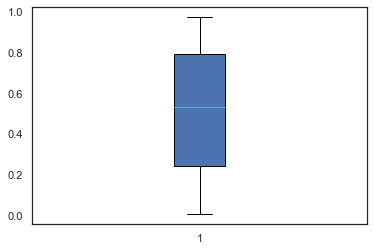

In [264]:
matPlotLibPyLib.boxplot(data_sample, vert=True, patch_artist=True)

In [299]:
data_sample1 = [numpy.random.standard_exponential(100), numpy.random.permutation(7), numpy.random.power(list(range(14))) ] 
data_sample1

[array([3.21778205, 0.04476401, 1.65039746, 0.78480236, 1.20580158,
        0.57526257, 0.24736272, 0.90472828, 0.10334705, 0.37813222,
        0.54350817, 0.75878844, 0.07827988, 2.23978116, 1.12531462,
        0.85076608, 0.4501733 , 0.82680982, 1.59320548, 0.50647692,
        0.57640132, 0.29044211, 0.09193253, 1.08591664, 2.35232832,
        0.53447531, 0.2684118 , 2.04603189, 2.13415877, 0.94362466,
        0.50392604, 1.62251812, 0.30927231, 0.67428851, 0.17308491,
        0.83608651, 1.30113732, 0.34216533, 1.30620884, 1.21986611,
        3.59532914, 0.02422708, 0.04264178, 2.5826946 , 1.61017891,
        0.29659122, 0.12100151, 1.60339352, 0.52394156, 2.56091218,
        1.24265906, 2.21624408, 0.19108765, 1.42793767, 0.67246016,
        0.58686381, 0.5638964 , 0.73966962, 1.18023547, 0.85340278,
        2.04709042, 0.6124092 , 0.02470828, 2.64250732, 1.82865649,
        0.50010914, 0.70701489, 1.56030254, 0.39024116, 0.06901618,
        1.6042414 , 0.23855106, 4.71096125, 1.92

{'whiskers': [<matplotlib.lines.Line2D at 0x22c3216f788>,
 'caps': [<matplotlib.lines.Line2D at 0x22c3216ffc8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x22c3216f348>,
 'medians': [<matplotlib.lines.Line2D at 0x22c32159f48>,
 'fliers': [<matplotlib.lines.Line2D at 0x22c32159b88>,
 'means': []}

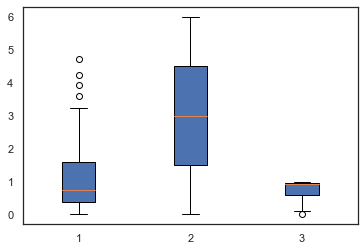

In [301]:
matPlotLibPyLib.boxplot(data_sample1, vert=True, patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c38ecb708>,
 'caps': [<matplotlib.lines.Line2D at 0x22c38ecb088>,
 'boxes': [<matplotlib.patches.PathPatch at 0x22c38ecbcc8>,
 'medians': [<matplotlib.lines.Line2D at 0x22c38e91cc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x22c38ec6348>,
 'means': []}

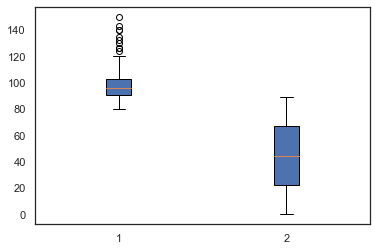

In [311]:
datasample_3 = [df_exercise.pulse, df_exercise.index]
matPlotLibPyLib.boxplot(datasample_3, vert=True, patch_artist=True)

In [312]:
#predict diabetes patien health condition
import pandas
pima = pandas.read_csv('pima-indians-diabetes.csv', index_col=0)

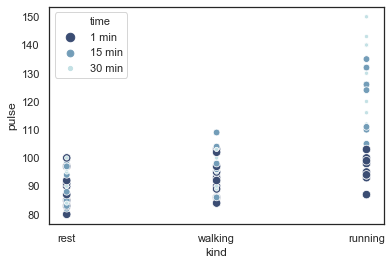

In [342]:
seaborn.scatterplot(data= df_exercise, x="kind", y="pulse",
             size="time", palette="ch:r=-.2,d=.3_r",  hue="time")

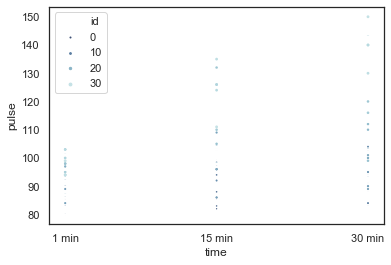

In [335]:
seaborn.scatterplot(data= df_exercise, x="time", y="pulse",
             size="id", palette="ch:r=-.2,d=.3_r", sizes=(1, 8), linewidth=40)